In [ ]:
import numpy as np 
import pandas as pd
import numpy as np
import os
import imutils
import dlib 
import cv2 
import imageio
from imutils import face_utils
from skimage.transform import resize
import time

In [ ]:
splits = '/content/drive/MyDrive/splits/'
X_train = np.load(splits + 'X_train.npy')
X_val = np.load(splits + 'X_val.npy')
X_test = np.load(splits + 'X_test.npy')
y_train = np.load(splits + 'y_train.npy')
y_val = np.load(splits + 'y_val.npy')
y_test = np.load(splits + 'y_test.npy')

In [ ]:
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.layers.core import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape
# from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()

# 1st layer group
model.add(Conv3D(32, (3, 3, 3), strides = 1, input_shape=(22, 100, 100, 1), activation='relu', padding='valid'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(64, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

# reshape layer
# shape = model.get_output_shape_at(0)
shape = model.layers[-1].output_shape
model.add(Reshape((shape[-1],shape[1]*shape[2]*shape[3])))


# LSTMS - Recurrent Network Layer
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.3))

model.add(LSTM(32, return_sequences=True))
model.add(Dropout(.3))


model.add((Flatten()))

# # FC layers group
model.add(Dense(2048, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 20, 98, 98, 32)    896       
                                                                 
 max_pooling3d (MaxPooling3D  (None, 10, 49, 49, 32)   0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 8, 47, 47, 64)     55360     
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 4, 23, 23, 64)    0         
 3D)                                                             
                                                                 
 conv3d_2 (Conv3D)           (None, 2, 21, 21, 128)    221312    
                                                                 
 max_pooling3d_2 (MaxPooling  (None, 1, 10, 10, 128)   0

In [ ]:
t1 = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=45, batch_size= 16)
t2 = time.time()
print()
print(f"Training time : {t2 - t1} secs.")

Epoch 1/45
75/75 [==============================] - 25s 153ms/step - loss: 2.3221 - accuracy: 0.0925 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 2/45
75/75 [==============================] - 10s 138ms/step - loss: 2.3132 - accuracy: 0.0825 - val_loss: 2.3069 - val_accuracy: 0.1000
Epoch 3/45
75/75 [==============================] - 10s 137ms/step - loss: 2.3137 - accuracy: 0.1050 - val_loss: 2.2816 - val_accuracy: 0.1850
Epoch 4/45
75/75 [==============================] - 10s 138ms/step - loss: 2.1882 - accuracy: 0.2008 - val_loss: 2.1241 - val_accuracy: 0.2400
Epoch 5/45
75/75 [==============================] - 10s 139ms/step - loss: 1.8605 - accuracy: 0.3083 - val_loss: 1.8450 - val_accuracy: 0.3900
Epoch 6/45
75/75 [==============================] - 11s 140ms/step - loss: 1.5379 - accuracy: 0.4275 - val_loss: 1.5556 - val_accuracy: 0.4400
Epoch 7/45
75/75 [==============================] - 10s 140ms/step - loss: 1.3268 - accuracy: 0.5250 - val_loss: 1.5016 - val_accuracy: 0.4650

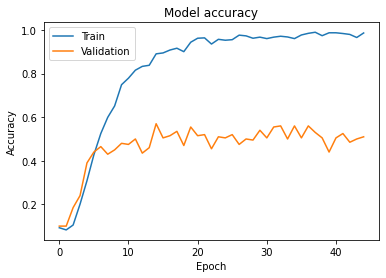

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.save('/content/models/lstm6432_adam_e45_bc16/model.h5')
model.save_weights('/content//models/lstm6432_adam_e45_bc16/model_weights.h5')

In [ ]:
model = Sequential()

# 1st layer group
model.add(Conv3D(32, (3, 3, 3), strides = 1, input_shape=(22, 100, 100, 1), activation='relu', padding='valid'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(64, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

# reshape layer
# shape = model.get_output_shape_at(0)
shape = model.layers[-1].output_shape
model.add(Reshape((shape[-1],shape[1]*shape[2]*shape[3])))


# LSTMS - Recurrent Network Layer
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.5))

model.add(LSTM(32, return_sequences=True))
model.add(Dropout(.5))


model.add((Flatten()))

# # FC layers group
model.add(Dense(2048, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_3 (Conv3D)           (None, 20, 98, 98, 32)    896       
                                                                 
 max_pooling3d_3 (MaxPooling  (None, 10, 49, 49, 32)   0         
 3D)                                                             
                                                                 
 conv3d_4 (Conv3D)           (None, 8, 47, 47, 64)     55360     
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 4, 23, 23, 64)    0         
 3D)                                                             
                                                                 
 conv3d_5 (Conv3D)           (None, 2, 21, 21, 128)    221312    
                                                                 
 max_pooling3d_5 (MaxPooling  (None, 1, 10, 10, 128)  

In [ ]:
t1 = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=45, batch_size= 16)
t2 = time.time()
print()
print(f"Training time : {t2 - t1} secs.")

Epoch 1/45
75/75 [==============================] - 14s 157ms/step - loss: 2.3150 - accuracy: 0.0933 - val_loss: 2.3237 - val_accuracy: 0.1000
Epoch 2/45
75/75 [==============================] - 11s 142ms/step - loss: 2.3171 - accuracy: 0.0875 - val_loss: 2.3047 - val_accuracy: 0.1000
Epoch 3/45
75/75 [==============================] - 11s 142ms/step - loss: 2.3149 - accuracy: 0.0883 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 4/45
75/75 [==============================] - 11s 141ms/step - loss: 2.3102 - accuracy: 0.0967 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 5/45
75/75 [==============================] - 11s 143ms/step - loss: 2.3079 - accuracy: 0.0925 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 6/45
75/75 [==============================] - 11s 141ms/step - loss: 2.3095 - accuracy: 0.0958 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/45
75/75 [==============================] - 11s 140ms/step - loss: 2.2902 - accuracy: 0.1350 - val_loss: 2.3056 - val_accuracy: 0.1050

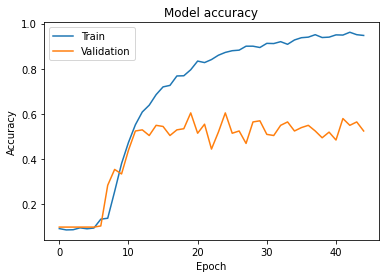

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()

# 1st layer group
model.add(Conv3D(32, (3, 3, 3), strides = 1, input_shape=(22, 100, 100, 1), activation='relu', padding='valid'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(64, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

# reshape layer
# shape = model.get_output_shape_at(0)
shape = model.layers[-1].output_shape
model.add(Reshape((shape[-1],shape[1]*shape[2]*shape[3])))


# LSTMS - Recurrent Network Layer
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.5))

model.add(LSTM(32, return_sequences=False))
model.add(Dropout(.5))


model.add((Flatten()))

# # FC layers group
model.add(Dense(2048, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_6 (Conv3D)           (None, 20, 98, 98, 32)    896       
                                                                 
 max_pooling3d_6 (MaxPooling  (None, 10, 49, 49, 32)   0         
 3D)                                                             
                                                                 
 conv3d_7 (Conv3D)           (None, 8, 47, 47, 64)     55360     
                                                                 
 max_pooling3d_7 (MaxPooling  (None, 4, 23, 23, 64)    0         
 3D)                                                             
                                                                 
 conv3d_8 (Conv3D)           (None, 2, 21, 21, 128)    221312    
                                                                 
 max_pooling3d_8 (MaxPooling  (None, 1, 10, 10, 128)  

In [ ]:
t1 = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=45, batch_size= 16)
t2 = time.time()
print()
print(f"Training time : {t2 - t1} secs.")

Epoch 1/45
75/75 [==============================] - 14s 156ms/step - loss: 2.3082 - accuracy: 0.0917 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 2/45
75/75 [==============================] - 10s 138ms/step - loss: 2.3061 - accuracy: 0.0900 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 3/45
75/75 [==============================] - 10s 138ms/step - loss: 2.3067 - accuracy: 0.0958 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/45
75/75 [==============================] - 10s 138ms/step - loss: 2.3054 - accuracy: 0.0975 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 5/45
75/75 [==============================] - 10s 138ms/step - loss: 2.3047 - accuracy: 0.0908 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/45
75/75 [==============================] - 10s 138ms/step - loss: 2.3075 - accuracy: 0.0967 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 7/45
75/75 [==============================] - 10s 137ms/step - loss: 2.3068 - accuracy: 0.0925 - val_loss: 2.3026 - val_accuracy: 0.1000

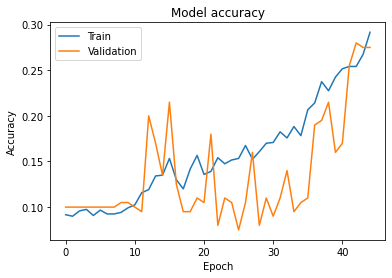

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

L1 regularization pushes weights towards exactly zero, encouraging a sparse model. L2 regularization will penalize the weights parameters without making them sparse since the penalty goes to zero for small weights—one reason why L2 is more common.

In [ ]:
import tensorflow as tf


In [ ]:
model = Sequential()

# 1st layer group
model.add(Conv3D(32, (3, 3, 3), strides = 1, input_shape=(22, 100, 100, 1), activation='relu', padding='valid'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(64, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))
model.add(Dropout(0.5))
# reshape layer
# shape = model.get_output_shape_at(0)
shape = model.layers[-1].output_shape
model.add(Reshape((shape[-1],shape[1]*shape[2]*shape[3])))


# LSTMS - Recurrent Network Layer
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.5))

model.add(LSTM(32, return_sequences=True))
model.add(Dropout(.5))


model.add((Flatten()))

# # FC layers group
model.add(Dense(2048, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(.5))
model.add(Dense(1024, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_24 (Conv3D)          (None, 20, 98, 98, 32)    896       
                                                                 
 max_pooling3d_24 (MaxPoolin  (None, 10, 49, 49, 32)   0         
 g3D)                                                            
                                                                 
 conv3d_25 (Conv3D)          (None, 8, 47, 47, 64)     55360     
                                                                 
 max_pooling3d_25 (MaxPoolin  (None, 4, 23, 23, 64)    0         
 g3D)                                                            
                                                                 
 conv3d_26 (Conv3D)          (None, 2, 21, 21, 128)    221312    
                                                                 
 max_pooling3d_26 (MaxPoolin  (None, 1, 10, 10, 128)  

In [ ]:
t1 = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=45, batch_size= 16)
t2 = time.time()
print()
print(f"Training time : {t2 - t1} secs.")

Epoch 1/45
75/75 [==============================] - 15s 157ms/step - loss: 4.1688 - accuracy: 0.0950 - val_loss: 2.8825 - val_accuracy: 0.1000
Epoch 2/45
75/75 [==============================] - 11s 143ms/step - loss: 2.5820 - accuracy: 0.1067 - val_loss: 2.4163 - val_accuracy: 0.1000
Epoch 3/45
75/75 [==============================] - 11s 142ms/step - loss: 2.3663 - accuracy: 0.0942 - val_loss: 2.3317 - val_accuracy: 0.1000
Epoch 4/45
75/75 [==============================] - 11s 142ms/step - loss: 2.3212 - accuracy: 0.0875 - val_loss: 2.3114 - val_accuracy: 0.1000
Epoch 5/45
75/75 [==============================] - 11s 141ms/step - loss: 2.3091 - accuracy: 0.0817 - val_loss: 2.3056 - val_accuracy: 0.1000
Epoch 6/45
75/75 [==============================] - 11s 141ms/step - loss: 2.3053 - accuracy: 0.0808 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 7/45
75/75 [==============================] - 11s 141ms/step - loss: 2.3044 - accuracy: 0.0983 - val_loss: 2.3031 - val_accuracy: 0.1000

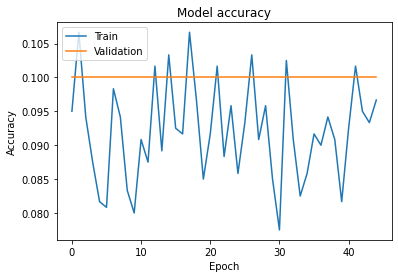

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()

# 1st layer group
model.add(Conv3D(32, (3, 3, 3), strides = 1, input_shape=(22, 100, 100, 1), activation='relu', padding='valid'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(64, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))
# model.add(Dropout(0.5))
# reshape layer
# shape = model.get_output_shape_at(0)
shape = model.layers[-1].output_shape
model.add(Reshape((shape[-1],shape[1]*shape[2]*shape[3])))


# LSTMS - Recurrent Network Layer
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.5))

model.add(LSTM(32, return_sequences=True))
model.add(Dropout(.5))


model.add((Flatten()))

# # FC layers group
model.add(Dense(2048, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(.5))
model.add(Dense(1024, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_27 (Conv3D)          (None, 20, 98, 98, 32)    896       
                                                                 
 max_pooling3d_27 (MaxPoolin  (None, 10, 49, 49, 32)   0         
 g3D)                                                            
                                                                 
 conv3d_28 (Conv3D)          (None, 8, 47, 47, 64)     55360     
                                                                 
 max_pooling3d_28 (MaxPoolin  (None, 4, 23, 23, 64)    0         
 g3D)                                                            
                                                                 
 conv3d_29 (Conv3D)          (None, 2, 21, 21, 128)    221312    
                                                                 
 max_pooling3d_29 (MaxPoolin  (None, 1, 10, 10, 128)  

In [ ]:
t1 = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=45, batch_size= 16)
t2 = time.time()
print()
print(f"Training time : {t2 - t1} secs.")

Epoch 1/45
75/75 [==============================] - 14s 156ms/step - loss: 3.9858 - accuracy: 0.0858 - val_loss: 2.8092 - val_accuracy: 0.1000
Epoch 2/45
75/75 [==============================] - 11s 142ms/step - loss: 2.5559 - accuracy: 0.0783 - val_loss: 2.4088 - val_accuracy: 0.1000
Epoch 3/45
75/75 [==============================] - 11s 143ms/step - loss: 2.3814 - accuracy: 0.1025 - val_loss: 2.3562 - val_accuracy: 0.1000
Epoch 4/45
75/75 [==============================] - 11s 141ms/step - loss: 2.3349 - accuracy: 0.1008 - val_loss: 2.3193 - val_accuracy: 0.1000
Epoch 5/45
75/75 [==============================] - 11s 142ms/step - loss: 2.3152 - accuracy: 0.1017 - val_loss: 2.3129 - val_accuracy: 0.1150
Epoch 6/45
75/75 [==============================] - 11s 141ms/step - loss: 2.3249 - accuracy: 0.1258 - val_loss: 2.3280 - val_accuracy: 0.1150
Epoch 7/45
75/75 [==============================] - 11s 141ms/step - loss: 2.3166 - accuracy: 0.1192 - val_loss: 2.2760 - val_accuracy: 0.1450

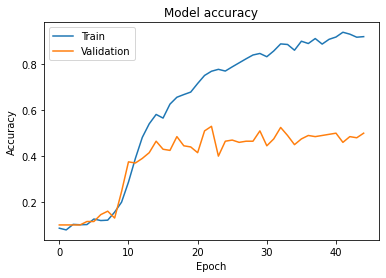

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model = Sequential()

# 1st layer group
model.add(Conv3D(32, (3, 3, 3), strides = 1, input_shape=(22, 100, 100, 1), activation='relu', padding='valid'))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(64, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))
# model.add(Dropout(0.5))
# reshape layer
# shape = model.get_output_shape_at(0)
shape = model.layers[-1].output_shape
model.add(Reshape((shape[-1],shape[1]*shape[2]*shape[3])))


# LSTMS - Recurrent Network Layer
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(.5))

model.add(LSTM(32, return_sequences=True))
model.add(Dropout(.5))


model.add((Flatten()))

# # FC layers group
model.add(Dense(2048, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dropout(.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_30 (Conv3D)          (None, 20, 98, 98, 32)    896       
                                                                 
 max_pooling3d_30 (MaxPoolin  (None, 10, 49, 49, 32)   0         
 g3D)                                                            
                                                                 
 conv3d_31 (Conv3D)          (None, 8, 47, 47, 64)     55360     
                                                                 
 max_pooling3d_31 (MaxPoolin  (None, 4, 23, 23, 64)    0         
 g3D)                                                            
                                                                 
 conv3d_32 (Conv3D)          (None, 2, 21, 21, 128)    221312    
                                                                 
 max_pooling3d_32 (MaxPoolin  (None, 1, 10, 10, 128) 

In [ ]:
t1 = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=45, batch_size= 16)
t2 = time.time()
print()
print(f"Training time : {t2 - t1} secs.")

Epoch 1/45
75/75 [==============================] - 16s 156ms/step - loss: 3.6411 - accuracy: 0.0983 - val_loss: 2.8511 - val_accuracy: 0.1000
Epoch 2/45
75/75 [==============================] - 11s 142ms/step - loss: 2.6141 - accuracy: 0.0817 - val_loss: 2.4348 - val_accuracy: 0.1000
Epoch 3/45
75/75 [==============================] - 11s 142ms/step - loss: 2.3734 - accuracy: 0.0975 - val_loss: 2.3329 - val_accuracy: 0.1000
Epoch 4/45
75/75 [==============================] - 11s 142ms/step - loss: 2.3241 - accuracy: 0.0783 - val_loss: 2.3119 - val_accuracy: 0.1000
Epoch 5/45
75/75 [==============================] - 11s 141ms/step - loss: 2.3115 - accuracy: 0.0933 - val_loss: 2.3085 - val_accuracy: 0.1000
Epoch 6/45
75/75 [==============================] - 11s 141ms/step - loss: 2.3089 - accuracy: 0.0925 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 7/45
75/75 [==============================] - 11s 141ms/step - loss: 2.3069 - accuracy: 0.0900 - val_loss: 2.3050 - val_accuracy: 0.1000

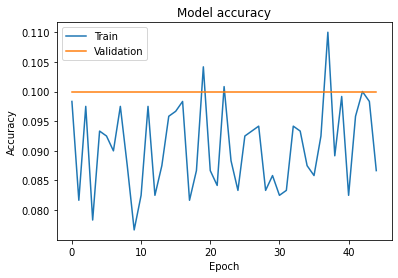

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()